Dataset link --> https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

# Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
df = pd.read_csv('mail_data.csv')

In [3]:
# first five rows of the dataset
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Number of rows & columns
print(df.shape)
print("Number of Rows", df.shape[0])
print("Number of Columns", df.shape[1])

(5572, 2)
Number of Rows 5572
Number of Columns 2


In [5]:
# basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
# checking for missing values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [7]:
# first five messages
for i in range(5):
    print(df['Message'].iloc[i], "\n")

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... 

Ok lar... Joking wif u oni... 

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's 

U dun say so early hor... U c already then say... 

Nah I don't think he goes to usf, he lives around here though 



# Text Preprocessing

In [8]:
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [9]:
def preprocessing(content):
    content = re.sub('[^a-zA-Z]',' ',content)
    content = content.lower()
    content = content.split()
    content = [lemmatizer.lemmatize(word) for word in content if not word in stopwords.words('english')]
    content = ' '.join(content)
    return content

In [10]:
df['Message'] = df['Message'].apply(preprocessing)

In [11]:
# first five messages after applying preprocessing
for i in range(5):
    print(df['Message'].iloc[i], "\n")

go jurong point crazy available bugis n great world la e buffet cine got amore wat 

ok lar joking wif u oni 

free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply 

u dun say early hor u c already say 

nah think go usf life around though 



# Target Column

In [12]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [13]:
df['Category'] = df['Category'].map({'spam':0, 'ham':1})
df.head()

,Category,Message
0,1,go jurong point crazy available bugis n great ...
1,1,ok lar joking wif u oni
2,0,free entry wkly comp win fa cup final tkts st ...
3,1,u dun say early hor u c already say
4,1,nah think go usf life around though


# Visualization

In [14]:
from wordcloud import WordCloud

In [15]:
spam = df[df['Category']==0]

ham = df[df['Category']==1]

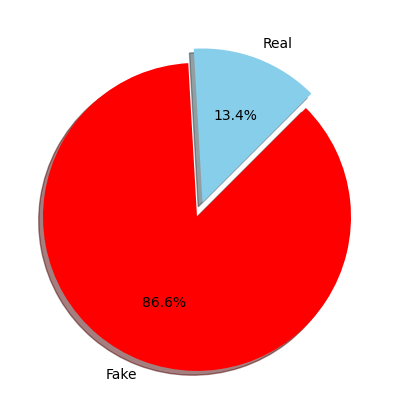

In [16]:
fig=plt.figure(figsize=(5,5))
colors=["skyblue",'red']
ck=[spam['Category'].count(),ham['Category'].count()]
legpie=plt.pie(ck,labels=["Real","Fake"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))

In [17]:
spam_msg = spam['Message']

ham_msg= ham['Message']

In [18]:
def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords=stopwords.words('english'),
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Normal messages are as follows


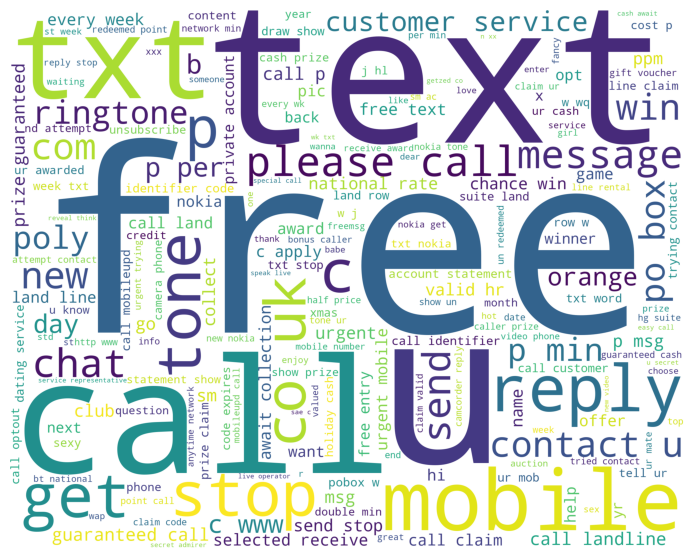

In [19]:
print("Normal messages are as follows")
wordcloud_draw(spam_msg)

Ham messages are as follows


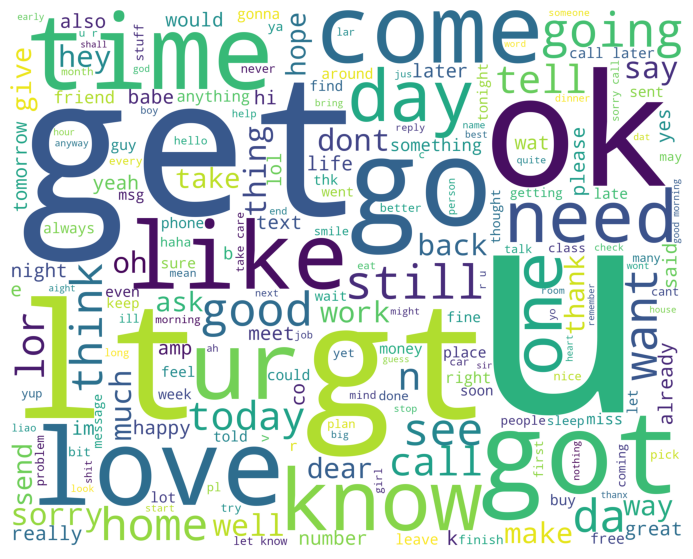

In [20]:
print("Ham messages are as follows")
wordcloud_draw(ham_msg)

# Splitting the data & label

In [21]:
x = df['Message']
Y = df['Category']

In [22]:
print(x)

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts st ...
3                     u dun say early hor u c already say
4                     nah think go usf life around though
                              ...                        
5567    nd time tried contact u u pound prize claim ea...
5568                            b going esplanade fr home
5569                                 pity mood suggestion
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object


In [23]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int64


# Text --> Numeric

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

vectorizer.fit(x)

X = vectorizer.transform(x)

In [25]:
print(X)

  (0, 6935)	0.2355585846155011
  (0, 6741)	0.19633321258370512
  (0, 4593)	0.23993395270917753
  (0, 3311)	0.2843252556020137
  (0, 3198)	0.351386238469353
  (0, 2545)	0.19410595173633666
  (0, 2508)	0.16456054199713366
  (0, 2472)	0.15480706750496417
  (0, 1337)	0.2721244533674184
  (0, 1087)	0.2968525142062683
  (0, 826)	0.2968525142062683
  (0, 824)	0.335436146610067
  (0, 431)	0.2628254467470435
  (0, 210)	0.351386238469353
  (1, 6848)	0.43162957585464123
  (1, 4252)	0.5466243141314314
  (1, 4226)	0.2718944069420321
  (1, 3340)	0.4083258549263009
  (1, 3168)	0.5236804332035243
  (2, 6898)	0.21237411923874353
  (2, 6859)	0.16022433748193038
  (2, 6441)	0.1380224544873437
  (2, 6264)	0.2461019317392661
  (2, 6138)	0.13269881881637288
  (2, 5817)	0.21922471060483015
  :	:
  (5567, 1094)	0.23551795385502808
  (5567, 877)	0.15651766330486755
  (5567, 813)	0.28528153281105817
  (5568, 2783)	0.3652059777476414
  (5568, 2479)	0.3642369776828009
  (5568, 2280)	0.5597098620657655
  (5568, 19

# Splitting the data into training & testing

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 42)

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [28]:
model.fit(x_train, y_train)

pred = model.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [30]:
accuracy = accuracy_score(y_test, pred)
print('Accuracy', accuracy)

Accuracy 0.9587443946188341


In [31]:
cm = confusion_matrix(y_test, pred)
print(cm)

[[105  44]
 [  2 964]]


In [32]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.70      0.82       149
           1       0.96      1.00      0.98       966

    accuracy                           0.96      1115
   macro avg       0.97      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



# Prediction

In [33]:
test_data = x_test[2]

prediction = model.predict(test_data)
print(prediction)

if (prediction[0]==0):
    print('This is Normal message')
else:
    print('This is Ham message')

[1]
This is Ham message
